Analiza danych i programowanie w Pythonie - zdanie egzaminacyjne

In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\pkawk\OneDrive\Pulpit\Patryk - materiały naukowe\Analiza danych i programowanie w Pythonie\Materiały na zajęcia\Zadanie egzaminacyjne\mobile-price-classification_train.csv")
pd.set_option('display.max.columns', None)
display(df.head())
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [418]:
df.loc[(df['price_range'] ==0), 'price_range_word'] = 'Low Cost'
df.loc[(df['price_range'] ==1), 'price_range_word'] = 'Medium Cost'
df.loc[(df['price_range'] ==2), 'price_range_word'] = 'High Cost'
df.loc[(df['price_range'] ==3), 'price_range_word'] = 'Very High Cost'

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price_range_word
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,Medium Cost
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,High Cost
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,High Cost
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,High Cost
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,Medium Cost


In [419]:
df.info();
#df.shape - można wykorzystać, aby poznać kszatałt tabeli, ale za pomocą metody .info też poznamy szerokość
#df.dtypes - za pomocą metody .dtypes wyświetlą się tylko nazwy kolumn i typy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   battery_power     2000 non-null   int64  
 1   blue              2000 non-null   int64  
 2   clock_speed       2000 non-null   float64
 3   dual_sim          2000 non-null   int64  
 4   fc                2000 non-null   int64  
 5   four_g            2000 non-null   int64  
 6   int_memory        2000 non-null   int64  
 7   m_dep             2000 non-null   float64
 8   mobile_wt         2000 non-null   int64  
 9   n_cores           2000 non-null   int64  
 10  pc                2000 non-null   int64  
 11  px_height         2000 non-null   int64  
 12  px_width          2000 non-null   int64  
 13  ram               2000 non-null   int64  
 14  sc_h              2000 non-null   int64  
 15  sc_w              2000 non-null   int64  
 16  talk_time         2000 non-null   int64  


In [420]:
print('Liczba wierszy w tabeli to:',df.shape[0],'natomiast liczba kolumn to:',df.shape[1],'.')

Liczba wierszy w tabeli to: 2000 natomiast liczba kolumn to: 22 .


In [421]:
#podstawowe statystyki kolumn wraz z transponowaniem T dla zwiększenia czytelności
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [422]:
#sprawdzenie ilosci pustych wartości
df.isna().sum()

battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range         0
price_range_word    0
dtype: int64

In [423]:
#sprawdzenie ilości unikalnych wartości w kolumnach
df.nunique()

battery_power       1094
blue                   2
clock_speed           26
dual_sim               2
fc                    20
four_g                 2
int_memory            63
m_dep                 10
mobile_wt            121
n_cores                8
pc                    21
px_height           1137
px_width            1109
ram                 1562
sc_h                  15
sc_w                  19
talk_time             19
three_g                2
touch_screen           2
wifi                   2
price_range            4
price_range_word       4
dtype: int64

In [424]:
#sprawdzenie czy są duplikaty
#w przypadku usunięcia duplikatów wykorzystałbym metodę .dropduplicates()
df.duplicated().sum()

0

In [425]:
#sprawdzenie ile jest wierszy dla każdej kategorii cenowej
#taki sam wynik uzyskalibyśmy za pomocą grupowania: df.groupby(['price_range']).size()
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

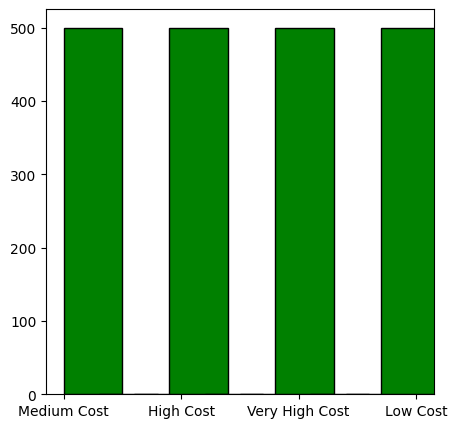

In [426]:
plt.figure(figsize = (5,5))
plt.hist(df['price_range_word'], width=0.5, color='Green', edgecolor='black')

plt.show()

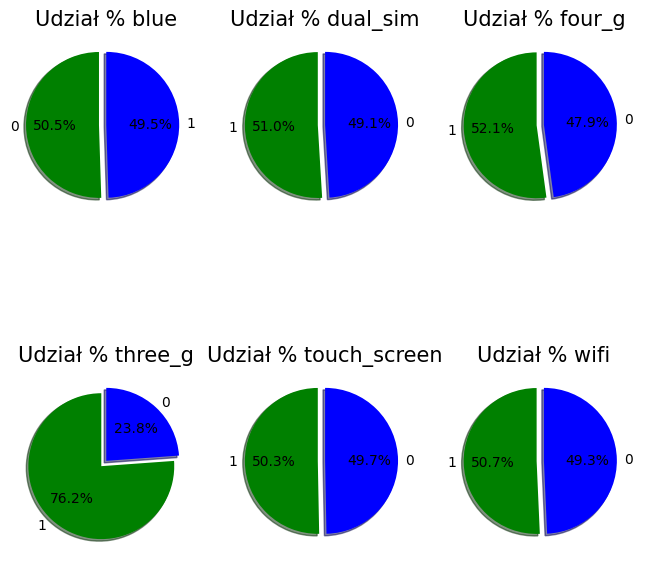

In [427]:
zmienne = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

plt.figure(figsize=(8,8))
count = 0

for i in zmienne:
    
    labels = df[i].value_counts().index
    sizes = df[i].value_counts().values  
    
    plt.subplot(2,3,count+1)
    plt.pie(sizes, labels=labels, explode = [0.1, 0], shadow=True, startangle=90, colors=['green','blue'], autopct='%1.1f%%')
    plt.title(f'Udział % {feature[count]}', color = 'black', fontsize = 15)
    count += 1

In [449]:
aggs_ram_wifi = df.groupby(by=['price_range']).agg({'blue':'sum', 'dual_sim':'sum', 'four_g':'sum', 'three_g':'sum', 'touch_screen':'sum', 'wifi': 'sum'})
display(aggs_ram_wifi.style.background_gradient(cmap='Greens', axis=None))

,blue,dual_sim,four_g,three_g,touch_screen,wifi
price_range,,,,,,
0,243,250,259,373,262,248
1,245,255,262,378,261,252
2,243,249,247,387,235,252
3,259,265,275,385,248,262


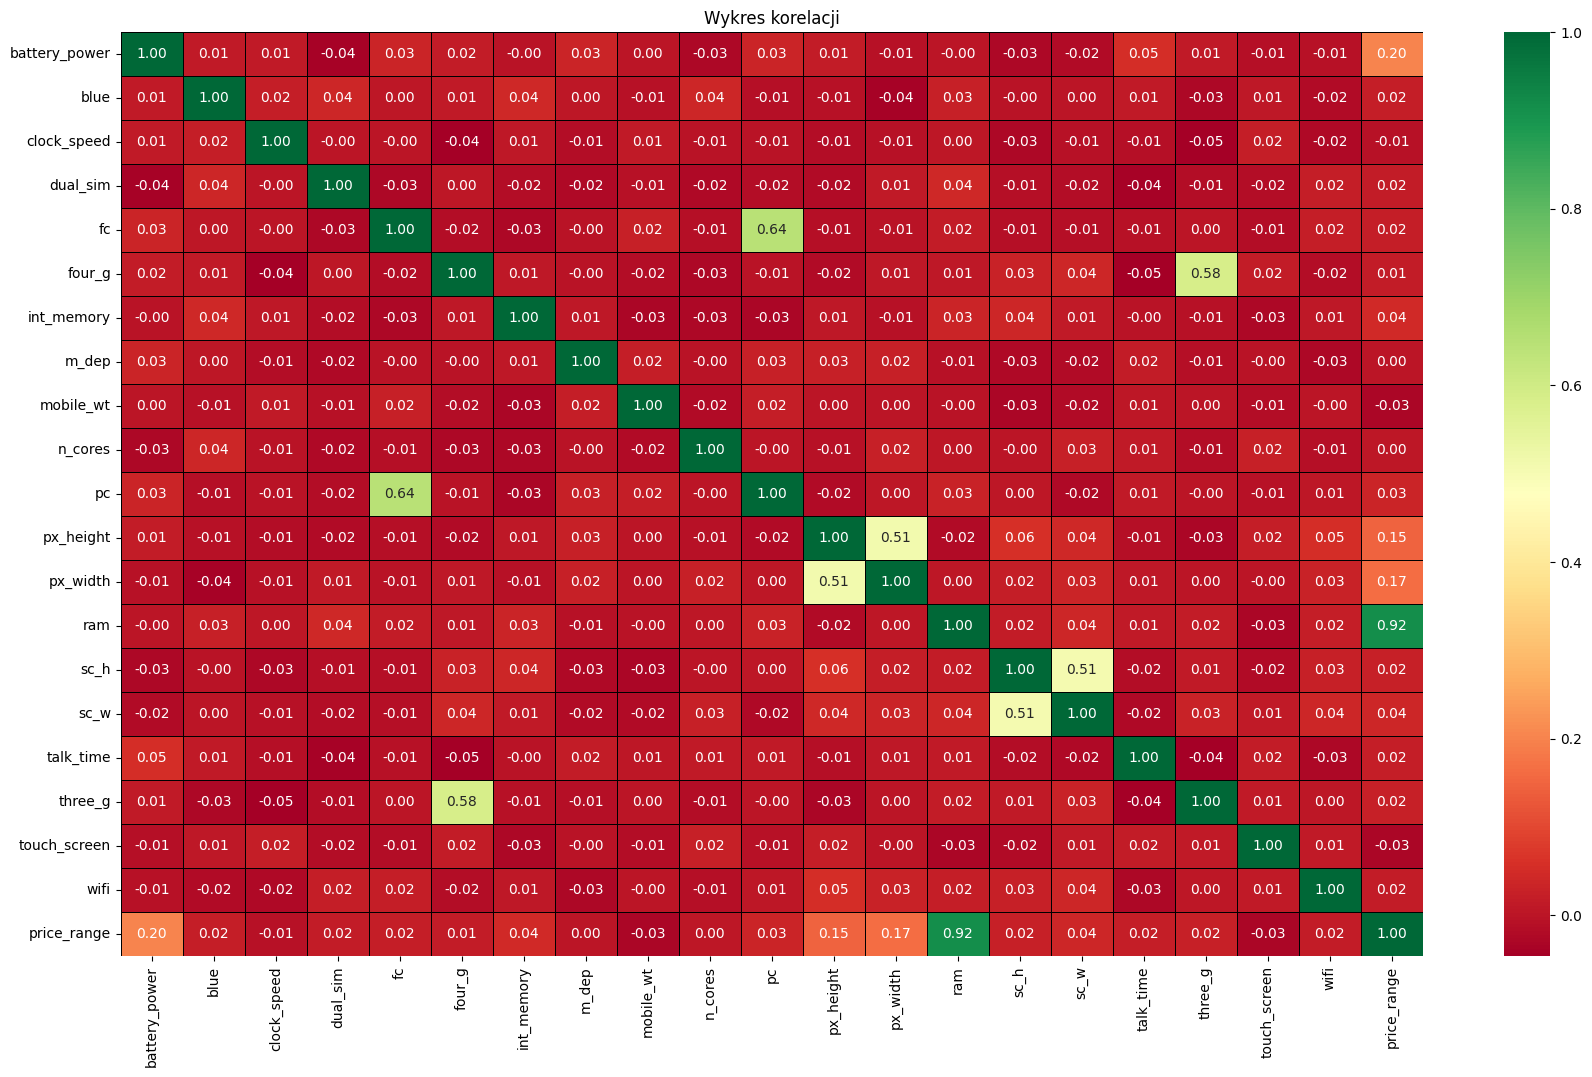

In [451]:
kolumna_do_ignorowania = 'price_range_word' #macierz bez słownie zapisanych wartości zakresów cen
df_bez_kolumny_word = df.drop(kolumna_do_ignorowania, axis=1)

corr_matrix = df_bez_kolumny_word.corr()

'''Korelacja może przyjąć wartości od -1 do +1. Odchylenie skrajnie ujemne oznacza, że im wyższa
jest wartość jednej zmiennej, tym niższa dla drugiej, z kolei skrajnie dodatni wynik oznacza, 
że obie wartości będą rosły lub malały synchronicznie. 0 wskazuje na całkowity brak związku pomiędzy zmiennymi.'''

plt.figure(figsize = (21,12))
sns.heatmap(corr_matrix, annot=True,fmt=".2f", annot_kws={"size":10}, cmap = 'RdYlGn', linewidths=0.5, linecolor='black')
plt.title('Wykres korelacji')
plt.show()

In [458]:
corr_matrix_price_range = corr_matrix['price_range'].sort_values()
corr_matrix_price_range

touch_screen    -0.030411
mobile_wt       -0.030302
clock_speed     -0.006606
m_dep            0.000853
n_cores          0.004399
four_g           0.014772
dual_sim         0.017444
wifi             0.018785
blue             0.020573
talk_time        0.021859
fc               0.021998
sc_h             0.022986
three_g          0.023611
pc               0.033599
sc_w             0.038711
int_memory       0.044435
px_height        0.148858
px_width         0.165818
battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

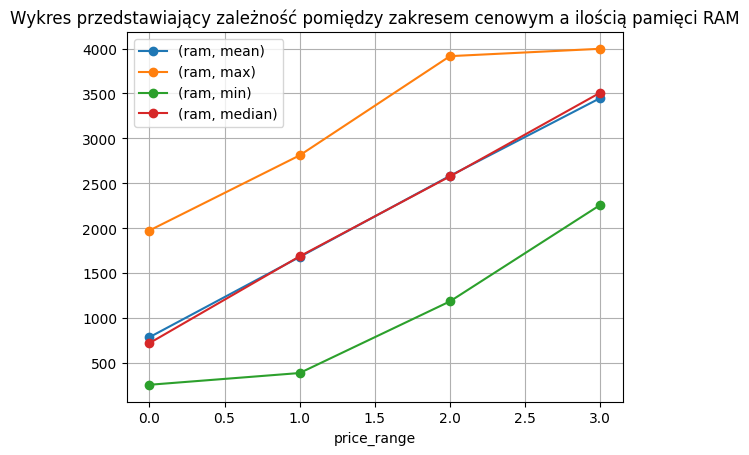

In [479]:
aggs_ram = df.groupby(['price_range']).agg({'ram': ['mean', 'max', 'min', 'median']})
display(aggs_ram.style.background_gradient(cmap='Greens', axis = None))
aggs_ram.plot(kind='line', title='Wykres przedstawiający zależność pomiędzy zakresem cenowym a ilością pamięci RAM', marker = 'o')
plt.legend()
plt.grid()
plt.show()

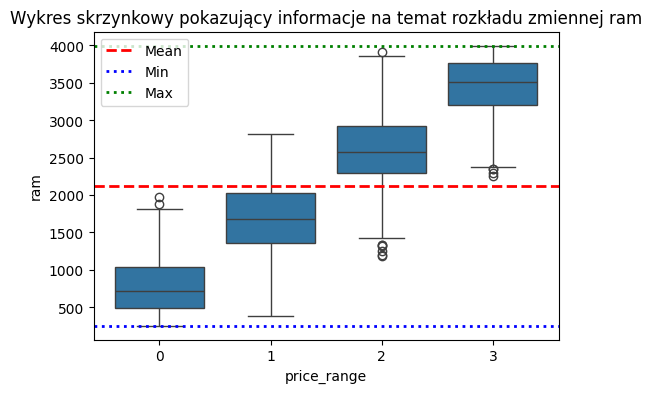

In [480]:
plt.figure(figsize=(6, 4))
sns.boxplot(df,x='price_range', y='ram')

plt.axhline(df['ram'].mean(), color='red', linestyle='--', linewidth=2, label='Mean') #linia średniej
plt.axhline(df['ram'].min(), color='blue', linestyle=':', linewidth=2, label='Min') #linia min
plt.axhline(df['ram'].max(), color='green', linestyle=':', linewidth=2, label='Max') # linia max

plt.axis('tight')
plt.title('Wykres skrzynkowy pokazujący informacje na temat rozkładu zmiennej ram')
plt.legend()
plt.show()

In [481]:
#Liczba unikalnych wartosci w kolumnie ram
unique_ram = df['ram'].nunique();
print('Liczba unikalnych wartości pamięci RAM to:', unique_ram)

Liczba unikalnych wartości pamięci RAM to: 1562


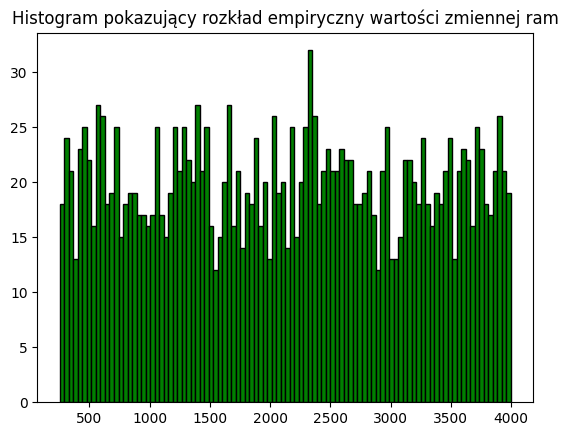

In [482]:
plt.hist(df['ram'], bins=100, color='Green', edgecolor='black')
plt.title('Histogram pokazujący rozkład empiryczny wartości zmiennej ram')
plt.show()

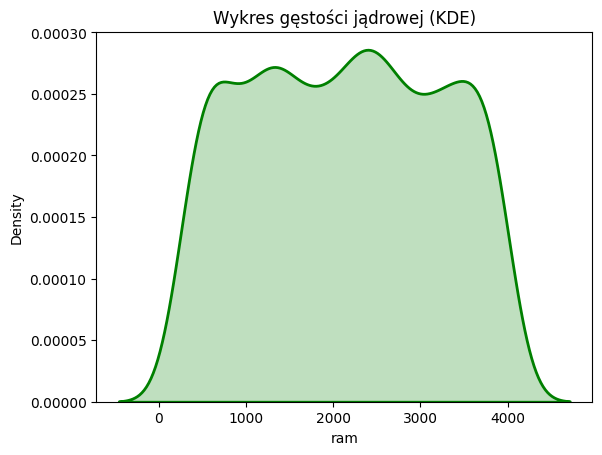

In [483]:
'''Wykres gęstości wykorzystuje się do zaprezentowania rozkładu zmiennej numerycznej.
Wykorzystuje oszacowanie gęstości jądra, aby pokazać funkcję gęstości prawdopodobieństwa zmiennej. 
Głównie polega to na przedstawieniu bardziej płynnego rozkłady poprzez wygładzenie szumu.'''

sns.kdeplot(df,x='ram', linewidth = 2, color='Green', fill=True)
plt.title('Wykres gęstości jądrowej (KDE)')
plt.show()

In [484]:
pivot_price_sim = pd.pivot_table(df, index=['price_range','price_range_word'],values=['battery_power','px_width','ram'], 
               aggfunc= ['min','max', 'mean']).round(2).style.background_gradient(cmap='Greens', axis = None)
pivot_price_sim


1. Główną zmienną wpływającą na cenę telefonu komórkowego jest ilośc pamięci ram. Współczynnik korelacji Pearsona pomiędzy ilością pamięci RAM a grupą cenową telefonu wynosi 0,92. Taka wartość oznacza silną dodatnią zależność liniową pomiędzy dwiema zmiennymi. W skrócie, oznacza to, że istnieje silna tendencja obu zmiennych do zmiany w tym samym kierunku: gdy jedna zmienna rośnie, druga zmienna również zwykle rośnie, a gdy jedna zmniejsza się, druga również zwykle maleje. 
2. Kolejnymi zmiennymi wpływającymi w zauważalny sposób na cenę telefonu jest pojemność baterii oraz rozdzielczość ekranu (wysokość i szerokość w pixelach).
3. Pozostałe zmienne zależne wykasują bardzo słabą zależność. Wartość bliska zeru wskazuje, że zmiany w jednej zmiennej nie są powiązane z powtarzalnymi zmianami w drugiej zmiennej w sposób liniowy. Wartość współczynnika korelacji Pearsona równa 0,03-0,05 sugeruje, że zmienne nie zmieniają się w sposób spójny lub powtarzalny w stosunku do siebie. Nawet jeśli zmienne zmieniają się razem, to robią to w sposób, który nie można opisać liniowo.
4. Średnia wartośc pamięci ram w telefonie jest o około 1000 większa w każdym następnym przedziale cenowym. W dwóch najdroższej grupie minimalna wartośc pamięci ram jest wyższa niż średnia wartość w całym zbiorze.

